Importing the necessary libraries.

In [597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Formatting the dataframes.
1. Adding the column names to each data frame. 
2. Changing the location names to a single word.
3. Checking for outliers using plots and handling them.
4. Removing the HCHO readings which are negative.
4. Checking for null values and handling them.

In [598]:
column_names = ['HCHO_Reading', 'Location', 'Current_Date', 'Next_Date'] # specifying the column names to be added to each  dataframe

### Colombo Matara Nuwara Eliya Data Frame

In [599]:
col_mat_nuw_df = pd.read_csv("col_mat_nuw_output.csv", header=None)
col_mat_nuw_df.columns = column_names # adding the column names to the dataframe
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [600]:
# converting the locations into a single word and make it uniform
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Colombo Proper", "Location"] = "Colombo"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Deniyaya, Matara", "Location"] = "Matara"
col_mat_nuw_df.loc[col_mat_nuw_df['Location'] == "Nuwara Eliya Proper", "Location"] = "Nuwara Eliya"
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya,2023-12-30,2023-12-31


In [601]:
col_mat_nuw_df.shape # checking the shape of the dataframe

(5478, 4)

In [602]:
col_mat_nuw_df.dtypes # checking the data types of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [603]:
# changing the data types of the date columns to datetime
col_mat_nuw_df["Current_Date"] = pd.to_datetime(col_mat_nuw_df["Current_Date"])
col_mat_nuw_df["Next_Date"]  = pd.to_datetime(col_mat_nuw_df["Next_Date"])
col_mat_nuw_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

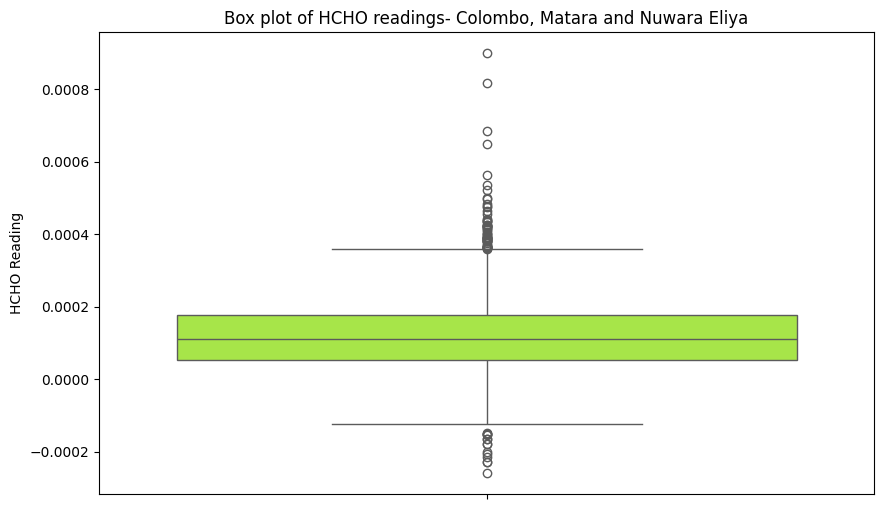

In [604]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=col_mat_nuw_df, y='HCHO_Reading', color='greenyellow')
plt.title("Box plot of HCHO readings- Colombo, Matara and Nuwara Eliya")
plt.ylabel("HCHO Reading")
plt.show()

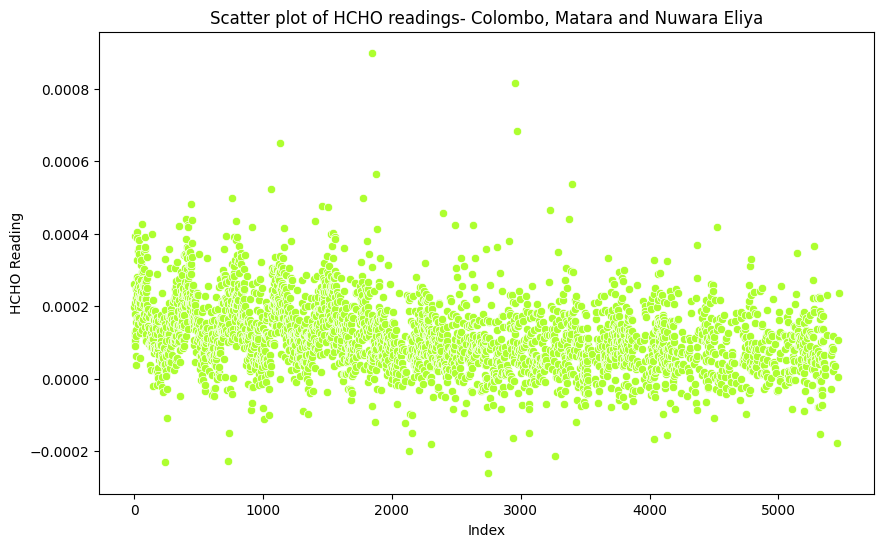

In [605]:
# let us try to draw a scatter plot to see if there is a relationship between the index(effectively thee date) and the HCHO readings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=col_mat_nuw_df, x=col_mat_nuw_df.index, y='HCHO_Reading', color='greenyellow')
plt.title("Scatter plot of HCHO readings- Colombo, Matara and Nuwara Eliya")
plt.xlabel("Index")
plt.ylabel("HCHO Reading")
plt.show()

In [606]:
# removing the negative HCHO readings
col_mat_nuw_df = col_mat_nuw_df[col_mat_nuw_df['HCHO_Reading'] >= 0]
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5427,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
5439,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
5459,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
5463,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


In [607]:
col_mat_nuw_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [608]:
mean_hcho_col_mat_nuw = col_mat_nuw_df.groupby('Location')['HCHO_Reading'].mean() # calculating the mean for each location

# defining a function to impute
def imputation_col_mat_nuw(row):
    if pd.isnull(row['HCHO_Reading']):
        return mean_hcho_col_mat_nuw[row['Location']]
    else:
        return row['HCHO_Reading']

col_mat_nuw_df['HCHO_Reading'] = col_mat_nuw_df.apply(imputation_col_mat_nuw, axis=1) # the function is applied to the data frame

C:\Users\arkha\AppData\Local\Temp\ipykernel_10632\1550988958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col_mat_nuw_df['HCHO_Reading'] = col_mat_nuw_df.apply(imputation_col_mat_nuw, axis=1) # the function is applied to the data frame


In [609]:
col_mat_nuw_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
5427,0.000041,Nuwara Eliya,2023-11-11,2023-11-12
5439,0.000036,Nuwara Eliya,2023-11-23,2023-11-24
5459,0.000108,Nuwara Eliya,2023-12-13,2023-12-14
5463,0.000006,Nuwara Eliya,2023-12-17,2023-12-18


In [610]:
col_mat_nuw_df.isnull().sum() # rechecking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

### Kandy Data Frame

In [611]:
kan_df = pd.read_csv("kan_output.csv", header=None)
kan_df.columns = column_names # adding the column names to the dataframe
kan_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy Proper,2019-01-01,2019-01-02
1,0.000092,Kandy Proper,2019-01-02,2019-01-03
2,NaN,Kandy Proper,2019-01-03,2019-01-04
3,0.000191,Kandy Proper,2019-01-04,2019-01-05
4,0.000122,Kandy Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy Proper,2023-12-27,2023-12-28
1822,NaN,Kandy Proper,2023-12-28,2023-12-29
1823,NaN,Kandy Proper,2023-12-29,2023-12-30
1824,0.000056,Kandy Proper,2023-12-30,2023-12-31


In [612]:
# converting the locations into a single word and make it uniform
kan_df.loc[kan_df['Location'] == "Kandy Proper", "Location"] = "Kandy"
kan_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
2,NaN,Kandy,2019-01-03,2019-01-04
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
...,...,...,...,...
1821,NaN,Kandy,2023-12-27,2023-12-28
1822,NaN,Kandy,2023-12-28,2023-12-29
1823,NaN,Kandy,2023-12-29,2023-12-30
1824,0.000056,Kandy,2023-12-30,2023-12-31


In [613]:
kan_df.shape # checking the shape of the dataframe

(1826, 4)

In [614]:
kan_df.dtypes # checking the data types of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [615]:
# changing the data types of the date columns to datetime
kan_df["Current_Date"] = pd.to_datetime(kan_df["Current_Date"])
kan_df["Next_Date"]  = pd.to_datetime(kan_df["Next_Date"])
kan_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

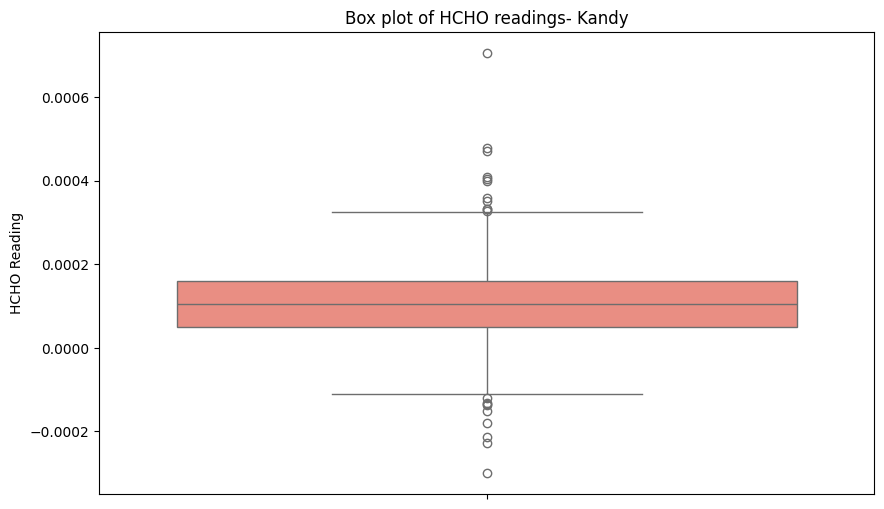

In [616]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=kan_df, y='HCHO_Reading', color='salmon')
plt.title("Box plot of HCHO readings- Kandy")
plt.ylabel("HCHO Reading")
plt.show()

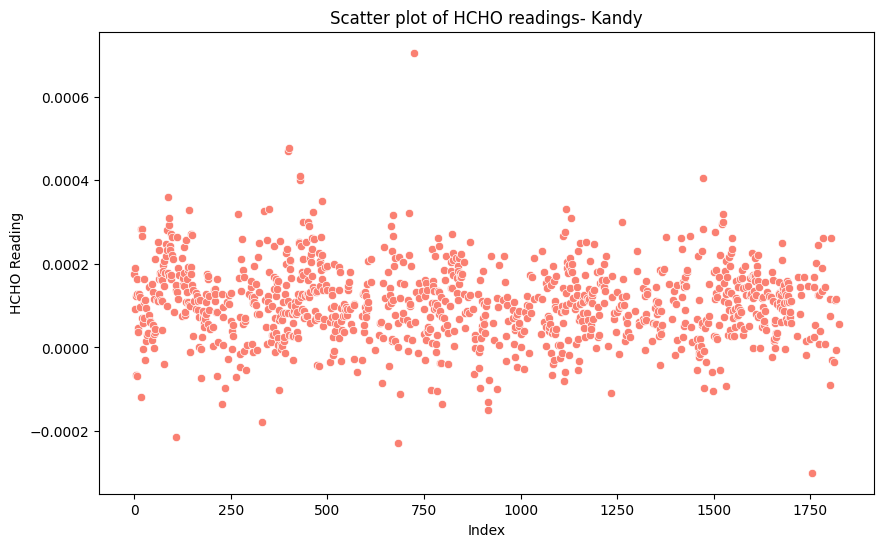

In [617]:
# let us try to draw a scatter plot to see if there is a relationship between the index(effectively thee date) and the HCHO readings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=kan_df, x=kan_df.index, y='HCHO_Reading', color='salmon')
plt.title("Scatter plot of HCHO readings- Kandy")
plt.xlabel("Index")
plt.ylabel("HCHO Reading")
plt.show()

In [618]:
# removing the negative HCHO readings
kan_df = kan_df[kan_df["HCHO_Reading"] >= 0]
kan_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
6,0.000163,Kandy,2019-01-07,2019-01-08
...,...,...,...,...
1801,0.000116,Kandy,2023-12-07,2023-12-08
1805,0.000261,Kandy,2023-12-11,2023-12-12
1815,0.000114,Kandy,2023-12-21,2023-12-22
1817,0.000116,Kandy,2023-12-23,2023-12-24


In [619]:
kan_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [620]:
kan_df['HCHO_Reading'].fillna(kan_df['HCHO_Reading'].mean(), inplace=True) # imputing the missing values using the mean.
kan_df

C:\Users\arkha\AppData\Local\Temp\ipykernel_10632\2827834565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kan_df['HCHO_Reading'].fillna(kan_df['HCHO_Reading'].mean(), inplace=True) # imputing the missing values using the mean.
C:\Users\arkha\AppData\Local\Temp\ipykernel_10632\2827834565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000176,Kandy,2019-01-01,2019-01-02
1,0.000092,Kandy,2019-01-02,2019-01-03
3,0.000191,Kandy,2019-01-04,2019-01-05
4,0.000122,Kandy,2019-01-05,2019-01-06
6,0.000163,Kandy,2019-01-07,2019-01-08
...,...,...,...,...
1801,0.000116,Kandy,2023-12-07,2023-12-08
1805,0.000261,Kandy,2023-12-11,2023-12-12
1815,0.000114,Kandy,2023-12-21,2023-12-22
1817,0.000116,Kandy,2023-12-23,2023-12-24


In [621]:
kan_df.isnull().sum() # rechecking for null values 

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

### Monaragala Kurunegala Jaffna Data Frame

In [622]:
mon_kur_jaf_df = pd.read_csv("mon_kur_jaf_output.csv", header=None)
mon_kur_jaf_df.columns = column_names # adding the column names to the dataframe
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,"Bibile, Monaragala",2019-01-01,2019-01-02
1,0.000019,"Bibile, Monaragala",2019-01-02,2019-01-03
2,0.000028,"Bibile, Monaragala",2019-01-03,2019-01-04
3,0.000037,"Bibile, Monaragala",2019-01-04,2019-01-05
4,-0.000018,"Bibile, Monaragala",2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [623]:
# converting the locations into a single word and make it uniform
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Bibile, Monaragala", "Location"] = "Monaragala"
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Kurunegala Proper", "Location"] = "Kurunegala"
mon_kur_jaf_df.loc[mon_kur_jaf_df['Location'] == "Jaffna Proper", "Location"] = "Jaffna"
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,NaN,Monaragala,2019-01-01,2019-01-02
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
4,-0.000018,Monaragala,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna,2023-12-27,2023-12-28
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [624]:
mon_kur_jaf_df.shape # checking the shape of the dataframe

(5478, 4)

In [625]:
mon_kur_jaf_df.dtypes # checking the data types of the dataframe

HCHO_Reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

In [626]:
# changing the data types of the date columns to datetime
mon_kur_jaf_df["Current_Date"] = pd.to_datetime(mon_kur_jaf_df["Current_Date"])
mon_kur_jaf_df["Next_Date"]  = pd.to_datetime(mon_kur_jaf_df["Next_Date"])
mon_kur_jaf_df.dtypes

HCHO_Reading           float64
Location                object
Current_Date    datetime64[ns]
Next_Date       datetime64[ns]
dtype: object

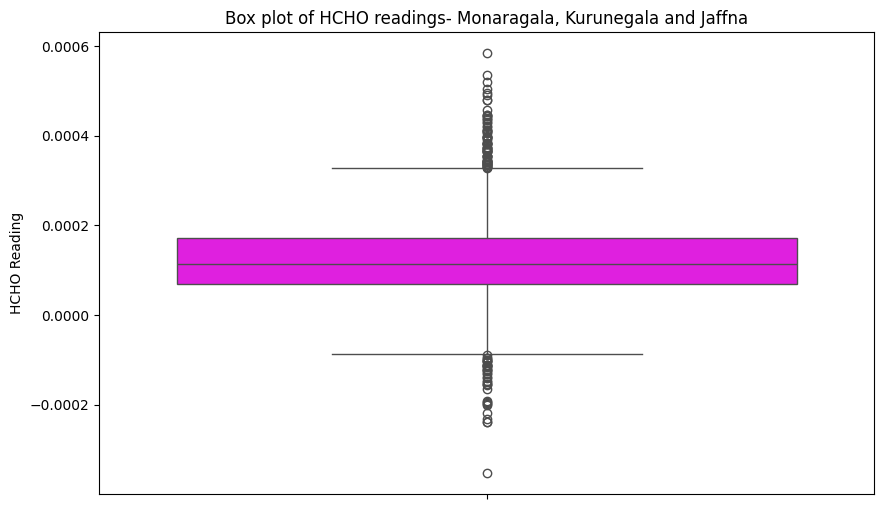

In [627]:
# let us draw a box plot to identify any possible outliers.
plt.figure(figsize=(10, 6))
sns.boxplot(data=mon_kur_jaf_df, y='HCHO_Reading', color='fuchsia')
plt.title("Box plot of HCHO readings- Monaragala, Kurunegala and Jaffna")
plt.ylabel("HCHO Reading")
plt.show()

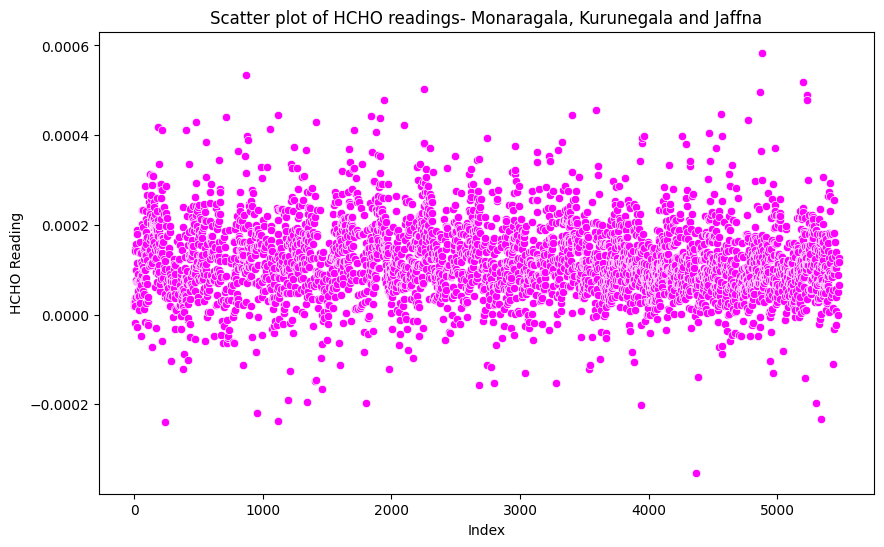

In [628]:
# let us try to draw a scatter plot to see if there is a relationship between the index(effectively thee date) and the HCHO readings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mon_kur_jaf_df, x=mon_kur_jaf_df.index, y='HCHO_Reading', color='fuchsia')
plt.title("Scatter plot of HCHO readings- Monaragala, Kurunegala and Jaffna")
plt.xlabel("Index")
plt.ylabel("HCHO Reading")
plt.show()

In [629]:
# removing the negative HCHO readings
mon_kur_jaf_df = mon_kur_jaf_df[mon_kur_jaf_df['HCHO_Reading'] >= 0]
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
5,0.000146,Monaragala,2019-01-06,2019-01-07
6,0.000028,Monaragala,2019-01-07,2019-01-08
...,...,...,...,...
5470,0.000088,Jaffna,2023-12-24,2023-12-25
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [630]:
mon_kur_jaf_df.isnull().sum() # checking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

In [631]:
mean_hcho_mon_kur_jaf = mon_kur_jaf_df.groupby('Location')['HCHO_Reading'].mean() # calculating the mean for each location in the data frame

# defining a function to impute for this particular data frame
def imputation_mon_kur_jaf(row):
    if pd.isnull(row['HCHO_Reading']):
        return mean_hcho_mon_kur_jaf[row['Location']]
    else:
        return row['HCHO_Reading']
    
mon_kur_jaf_df['HCHO_Reading'] = mon_kur_jaf_df.apply(imputation_mon_kur_jaf, axis=1) # the function is applied to the data frame

C:\Users\arkha\AppData\Local\Temp\ipykernel_10632\2216483331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon_kur_jaf_df['HCHO_Reading'] = mon_kur_jaf_df.apply(imputation_mon_kur_jaf, axis=1) # the function is applied to the data frame


In [632]:
mon_kur_jaf_df

,HCHO_Reading,Location,Current_Date,Next_Date
1,0.000019,Monaragala,2019-01-02,2019-01-03
2,0.000028,Monaragala,2019-01-03,2019-01-04
3,0.000037,Monaragala,2019-01-04,2019-01-05
5,0.000146,Monaragala,2019-01-06,2019-01-07
6,0.000028,Monaragala,2019-01-07,2019-01-08
...,...,...,...,...
5470,0.000088,Jaffna,2023-12-24,2023-12-25
5474,0.000051,Jaffna,2023-12-28,2023-12-29
5475,0.000127,Jaffna,2023-12-29,2023-12-30
5476,0.000117,Jaffna,2023-12-30,2023-12-31


In [633]:
mon_kur_jaf_df.isnull().sum() # rechecking for null values

HCHO_Reading    0
Location        0
Current_Date    0
Next_Date       0
dtype: int64

## Merging the Data Frames.

Let us merge the three data frames into one combined data frame.

In [634]:
combined_df = pd.concat([col_mat_nuw_df,kan_df.iloc[1:],mon_kur_jaf_df.iloc[1:]], ignore_index=True) # merging while removing the first row of the second and third data frames
combined_df

,HCHO_Reading,Location,Current_Date,Next_Date
0,0.000197,Colombo,2019-01-01,2019-01-02
1,0.000263,Colombo,2019-01-02,2019-01-03
2,0.000099,Colombo,2019-01-03,2019-01-04
3,0.000210,Colombo,2019-01-04,2019-01-05
4,0.000179,Colombo,2019-01-05,2019-01-06
...,...,...,...,...
7348,0.000088,Jaffna,2023-12-24,2023-12-25
7349,0.000051,Jaffna,2023-12-28,2023-12-29
7350,0.000127,Jaffna,2023-12-29,2023-12-30
7351,0.000117,Jaffna,2023-12-30,2023-12-31


Let us check the statistical measures for the overall dataset.

In [635]:
combined_df['HCHO_Reading'].describe() # getting the statistical measures for the overall dataset

count    7.353000e+03
mean     1.320695e-04
std      8.281939e-05
min      8.485600e-08
25%      7.192952e-05
50%      1.189362e-04
75%      1.775115e-04
max      8.997102e-04
Name: HCHO_Reading, dtype: float64

Let us print the statistical measures of HCHO reading for each location.

In [636]:
locations = ["Colombo","Matara","Nuwara Eliya","Monaragala","Kurunegala","Jaffna","Kandy"] # storing all the locations in a list

for location in locations:
    print(location)
    print(combined_df.loc[combined_df["Location"] == location, "HCHO_Reading"].describe())
    print("\n")

Colombo
count    1.287000e+03
mean     1.667836e-04
std      9.177146e-05
min      2.111934e-07
25%      1.001567e-04
50%      1.555551e-04
75%      2.232382e-04
max      6.500631e-04
Name: HCHO_Reading, dtype: float64


Matara
count    8.640000e+02
mean     1.097679e-04
std      8.702971e-05
min      8.485600e-08
25%      5.398255e-05
50%      9.262651e-05
75%      1.476359e-04
max      8.997102e-04
Name: HCHO_Reading, dtype: float64


Nuwara Eliya
count    6.450000e+02
mean     1.068345e-04
std      7.128769e-05
min      4.363303e-07
25%      5.114567e-05
50%      9.700648e-05
75%      1.470826e-04
max      4.191362e-04
Name: HCHO_Reading, dtype: float64


Monaragala
count    1.051000e+03
mean     1.404236e-04
std      8.053593e-05
min      1.461232e-07
25%      8.037681e-05
50%      1.301385e-04
75%      1.891829e-04
max      5.348281e-04
Name: HCHO_Reading, dtype: float64


Kurunegala
count    1.178000e+03
mean     1.426223e-04
std      7.852658e-05
min      1.433376e-07
25%      8

## Visualization of Data

Let us try to analyze the HCHO reading variation based on the location using a barplot.

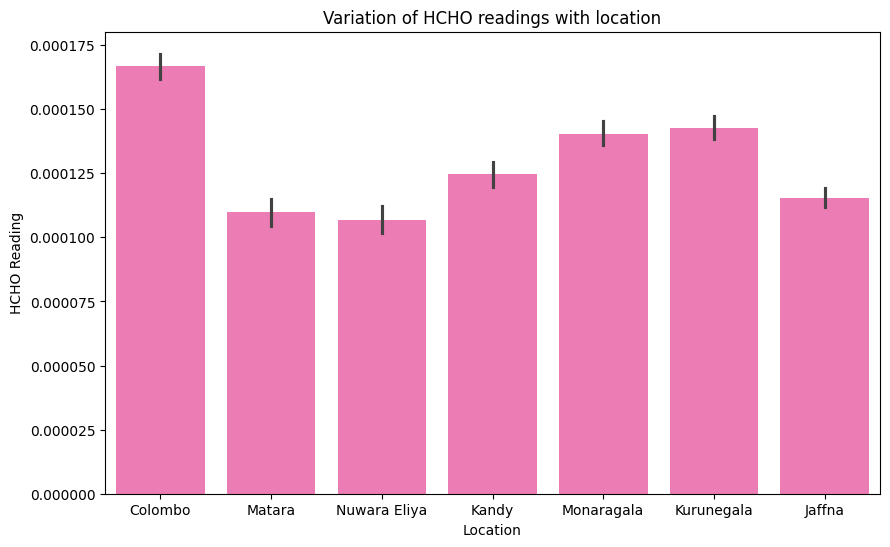

In [637]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df, x='Location', y='HCHO_Reading', color='hotpink')
plt.title("Variation of HCHO readings with location")
plt.xlabel("Location")
plt.ylabel("HCHO Reading")
plt.show()

Let us draw a histogram for the HCHO reading.

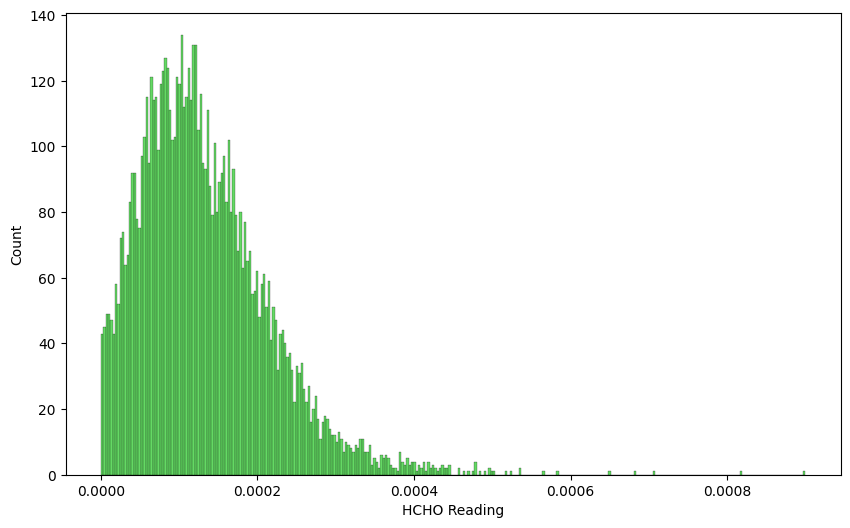

In [638]:
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x="HCHO_Reading", bins=300, color="limegreen")
plt.xlabel("HCHO Reading")
plt.show()

Let us analyze the spread of the HCHO readings for the whole dataset based on the location.

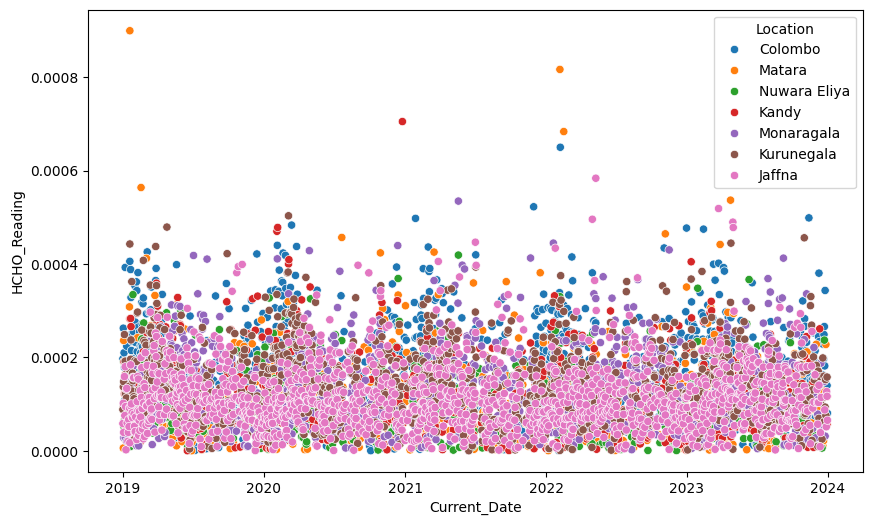

In [639]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=combined_df, x="Current_Date", y="HCHO_Reading", hue="Location")
plt.show()

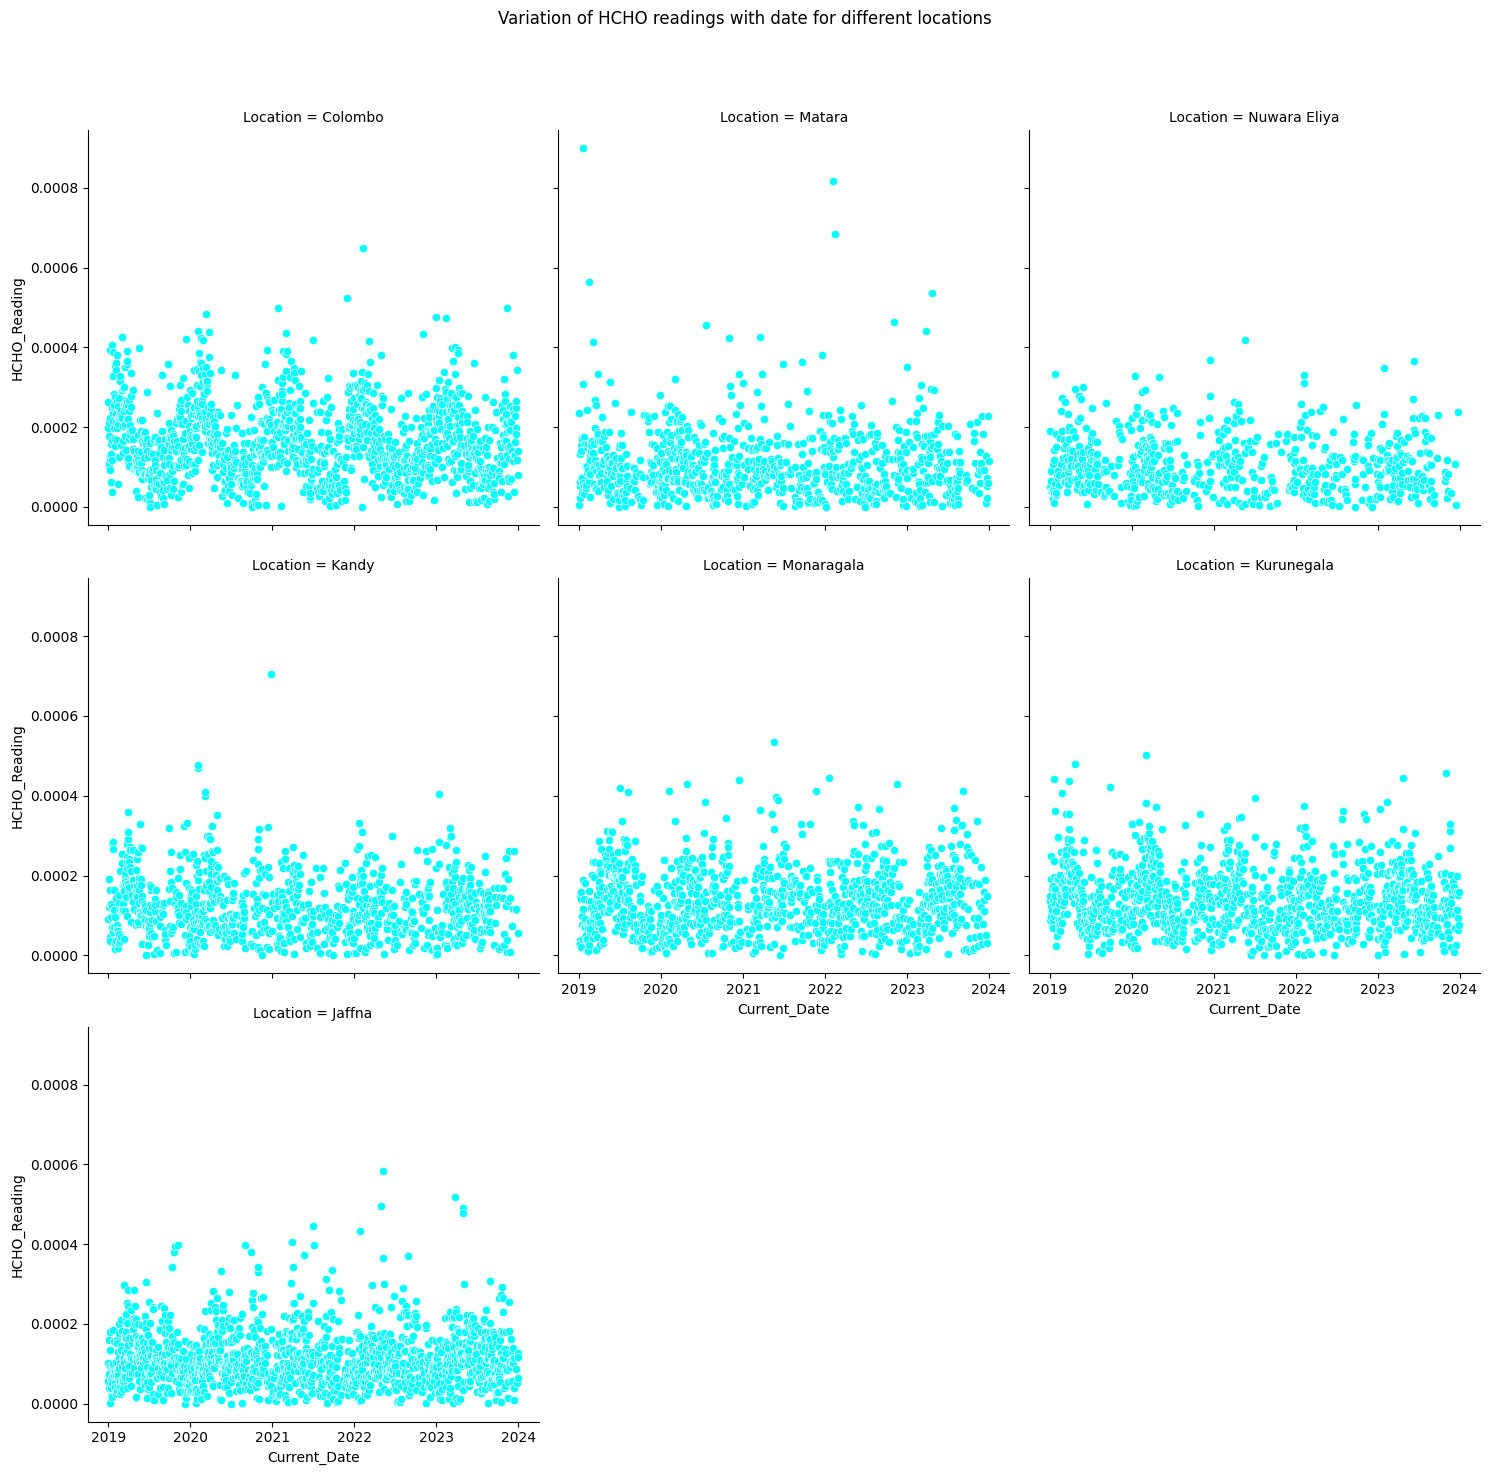

In [640]:
# let us draw the scatterplot for each location separately
g = sns.FacetGrid(combined_df, col='Location', col_wrap=3, height=5)
g.map(sns.scatterplot, "Current_Date", "HCHO_Reading", color="cyan")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Variation of HCHO readings with date for different locations")
plt.show()

# Spatio- Temporal Analysis

#### Mean height of cities above sea level
* Colombo- 38ft
* Matara- 33ft
* Nuwara Eliya- 6,139ft
* Kandy- 1,660ft
* Monaragala-465ft
* Kurunegala-399ft
* Jaffna- 27ft

- Source: https://whatismyelevation.com/

### Population density of the cities
* Colombo- 13,364 persons/km^2
* Matara- 630 persons/km^2
* Nuwara Eliya- 3,197 persons/km^2
* Kandy-710 persons/km^2
* Monaragala- 152 persons/km^2
* Kurunegala- 362 persons/km^2
* Jaffna- 611 persons/km^2

- Source: [Wikipedia](https://www.wikipedia.org/)